**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
diabetes_df=pd.read_csv("diabetes.csv")

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.shape

(768, 9)

**EDA**

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
statistics_description = diabetes_df.describe()
(statistics_description)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


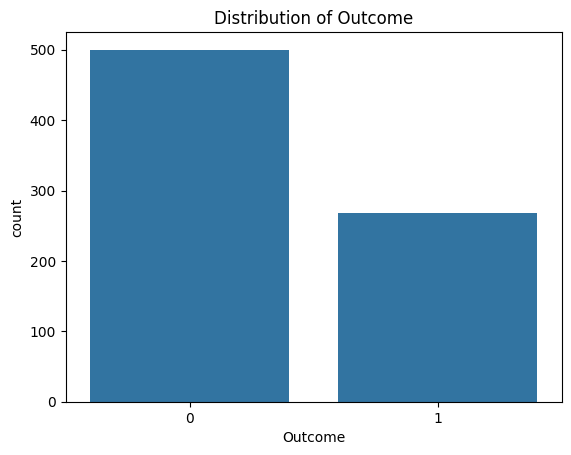

In [ ]:
sns.countplot(x='Outcome', data=diabetes_df)
plt.title('Distribution of Outcome')
plt.show()

In [ ]:
#correlation_matrix = diabetes_df.corr()
#plt.figure(figsize=(9, 5))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
#plt.show()

**Handling Missing Value**

In [ ]:
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Handling Data Duplikat**

In [ ]:
diabetes_df.drop_duplicates(inplace=True)

In [ ]:
diabetes_df.duplicated().sum()

0

**Handling Outlier**

In [ ]:
z_scores = stats.zscore(diabetes_df)

In [ ]:
threshold = 3

In [ ]:
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

In [ ]:
diabetes_df = diabetes_df[~outlier_indices]

In [ ]:
"Jumlah outlier yang dihapus:", sum(outlier_indices)

('Jumlah outlier yang dihapus:', 80)

**Data Setelah Pembersihan**

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
diabetes_df.shape

(688, 9)

**Split Data**

In [ ]:
training_df, testing_df = train_test_split(diabetes_df)

In [ ]:
"Ukuran set pelatihan (training set):", training_df.shape

('Ukuran set pelatihan (training set):', (516, 9))

In [ ]:
"Ukuran set pengujian (testing set):", testing_df.shape

('Ukuran set pengujian (testing set):', (172, 9))

**Simpan Data ke Dalam File CSV**

In [ ]:
# training_df.to_csv("training_data.csv", index=False)

In [ ]:
# testing_df.to_csv("testing_data.csv", index=False)

**Evaluation**

In [ ]:
# function untuk melakukan perhitungan seluruh metric evaluasi -> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]

**Insight Decision Tree**

In [ ]:
X=diabetes_df.iloc[:,0:-1]
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [ ]:

y=diabetes_df.iloc[:,-1]
y.head(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20,stratify=y)
# fit model Decision Tree -> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# predict model ke data test
y_pred_dt=dt.predict(X_test)

In [ ]:
# evaluation score untuk model Decision Tree
#[accuracy, precision, recall, f1]
get_metrics(y_test,y_pred_dt)

[0.7319, 0.7279, 0.7319, 0.7295]

In [ ]:
hasil=['dt']+get_metrics(y_test,y_pred_dt)

In [ ]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


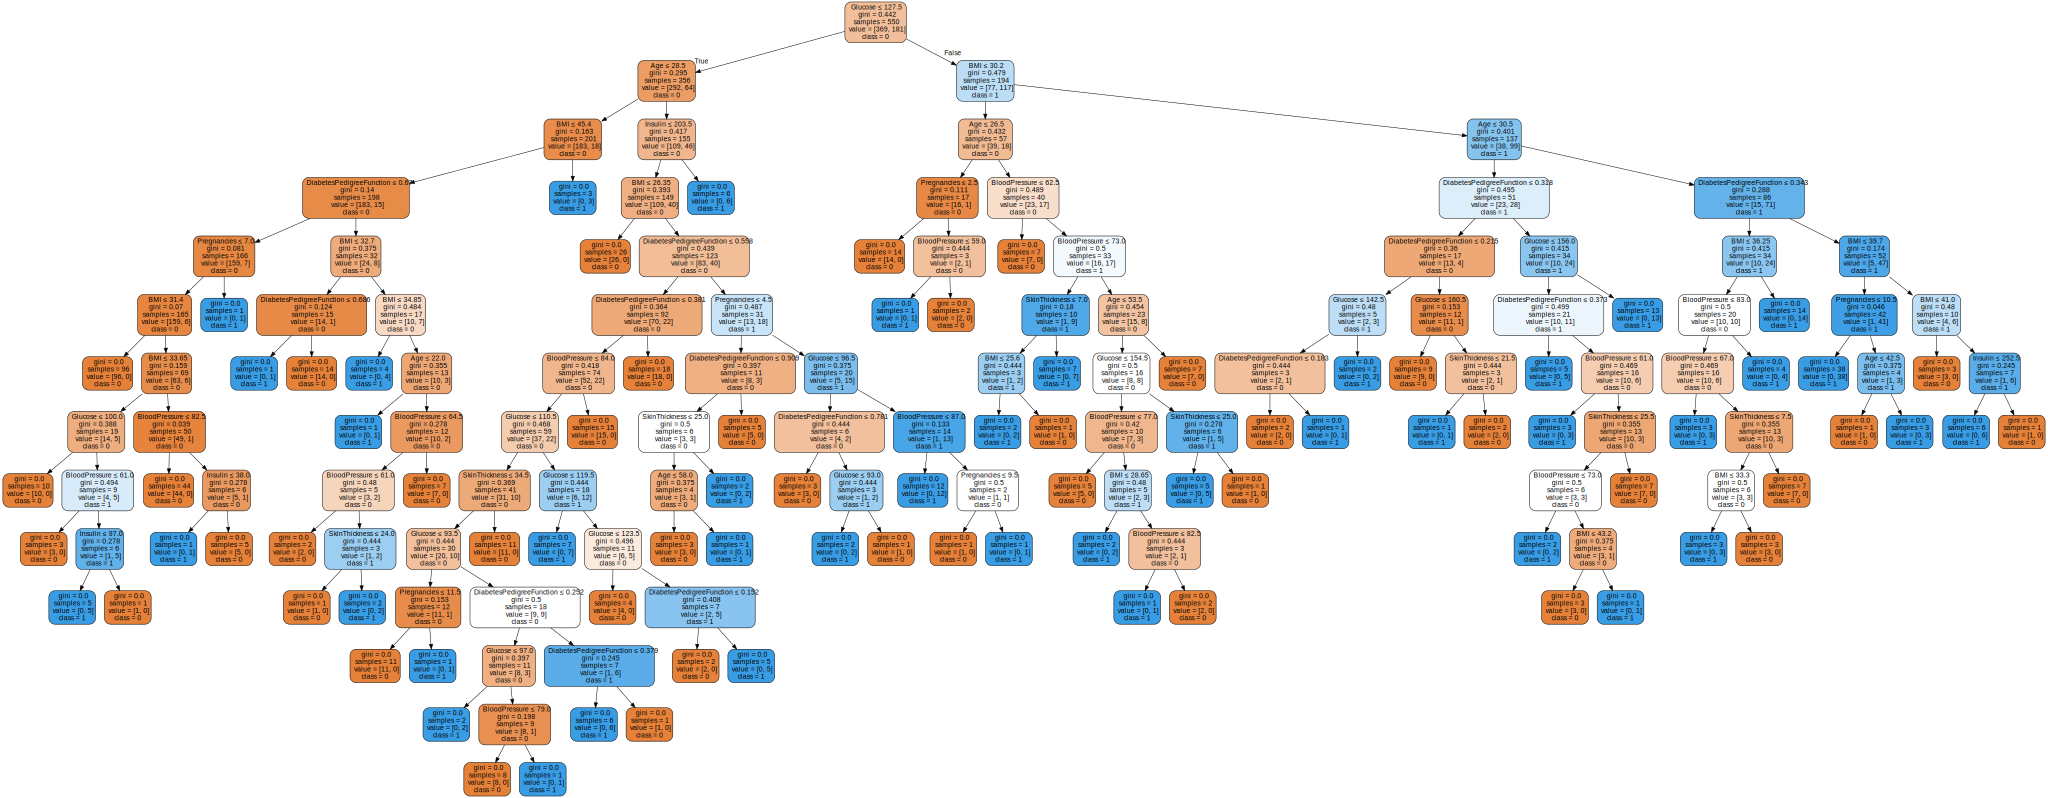

In [ ]:
import graphviz
from sklearn import model_selection, tree
from sklearn import tree
from sklearn.tree import export_text
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")
var_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
categories = ['0', '1']
dot_data = tree.export_graphviz(dt, out_file=None,
                         feature_names = var_names,
                         class_names=categories,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# input data
scaler = StandardScaler()
scaler.fit(X)

input_data  =(6,48,62,35,0,33.6,0.627,50)

array_data = np.array(input_data)
shape_data = array_data.reshape(1, -1)
data_std = scaler.transform(shape_data)
print(data_std)

prediction = dt.predict(data_std)
if(prediction[0] == 0):
   print('Tidak terdeteksi diabetes')
else :
   print('Terdeteksi Diabetes')

[[ 0.65735547 -2.41107468 -0.84086539  0.92321895 -0.80526561  0.21028523
   0.60651604  1.47921983]]
Tidak terdeteksi diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# tree_rules = tree.export_text(dt, feature_names=list(X_train.columns))
# print(tree_rules)

In [ ]:
# def parse_decision_tree(tree_text):
#     lines = tree_text.split("\n")
#     for line in lines:
#         if "class" in line:
#             print("    " * line.count("|") + line.split("|--- class: ")[-1])
#             continue
#         indent_level = line.count("|")
#         condition = line.split("|---")[-1].strip()
#         if " " in condition:
#             print("    " * indent_level + f"if {condition}:")
#         else:
#             print("    " * indent_level + f"else:")
#     print("    " * (indent_level + 1) + "return prediction")

# # Mengonversi dan mencetak struktur if-else
# parse_decision_tree(tree_rules)

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(dt, open(filename, 'wb'))